# Implementation Of KNN Classifier

In [1]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv(r"D:\Projects\Investment _Prediction\Stock_data\AAPL.csv")
#print(data)

x=data[['Open-Close','High-Low']]
#print(x)
y=data['target']

In [5]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25)

In [6]:

#using gridsearch to find the best parameter
params = { 'n_neighbors' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn=neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)


In [7]:

# fit the model
model.fit(x_train, y_train)

#predicted_values=model.predict(x_test)
# Accuracy Score
accuracy_train = accuracy_score(y_train,model.predict(x_train))
accuracy_test =accuracy_score(y_test,model.predict(x_test))
print('Train_data Accuracy: %.2f' %accuracy_train)
print( 'Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.62
Test_data Accuracy: 0.50


In [8]:
predicted_value=model.predict(x_test)
actual_predicted_data=pd.DataFrame({'Actual Value':y_test,'Predicted value':predicted_value})
actual_predicted_data.head(10)

,Actual Value,Predicted value
5618,-1,-1
1661,1,-1
8992,-1,-1
2843,1,-1
4838,1,-1
7749,-1,1
6847,-1,1
6911,1,-1
9801,1,-1
4032,1,1


# Implementation of KNN Regressor

In [9]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor

In [10]:
Y=data['Close']

In [11]:
x_train_reg, x_test_reg, y_train_reg, y_test_reg=train_test_split(x,Y,test_size=0.25,random_state=44)


In [13]:

#using gridsearch to find the best parameter
params = { 'n_neighbors' : [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg=neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv=5)


In [14]:

# fit the model
model_reg.fit(x_train_reg, y_train_reg)


predicted_value_reg=model_reg.predict(x_test_reg)
# Accuracy Score
# accuracy_train_reg = accuracy_score(y_train_reg,model.predict(x_train_reg))
#accuracy_test_reg =accuracy_score(y_test_reg,model.predict(x_test_reg))
#print('Train_data Accuracy: %.2f' %accuracy_train_reg)
#print( 'Test_data Accuracy: %.2f' %accuracy_test_reg)

print(predicted_value_reg)

[ 0.3315998  16.12835697  0.43390347 ... 18.83919055  0.05684547
  9.60192839]


In [15]:
import numpy as np
rms=np.sqrt(np.mean(np.power(np.array(y_test_reg-np.array(predicted_value_reg)),2)))
print(rms)

14.213290321485433


In [28]:

reg_model=pd.DataFrame({'Actual Value':y_test_reg,'Predicted value':predicted_value_reg})
print(reg_model.head(100))

print(reg_model)



       Actual Value  Predicted value
5271       0.333393         0.331600
8341      19.409286        16.128357
4494       0.342076         0.433903
7443       9.274643         5.809690
841        0.110491         0.131176
...             ...              ...
4420       0.252232         0.233516
1109       0.085938         0.174554
10115    143.160004       155.319498
7492       8.568929         7.431309
1578       0.291295         0.369080

[100 rows x 2 columns]
      Actual Value  Predicted value
5271      0.333393         0.331600
8341     19.409286        16.128357
4494      0.342076         0.433903
7443      9.274643         5.809690
841       0.110491         0.131176
...            ...              ...
7368      7.307857         5.745317
3183      0.245536         0.775170
8342     19.161428        18.839191
392       0.053571         0.056845
7173      4.551786         9.601928

[2747 rows x 2 columns]


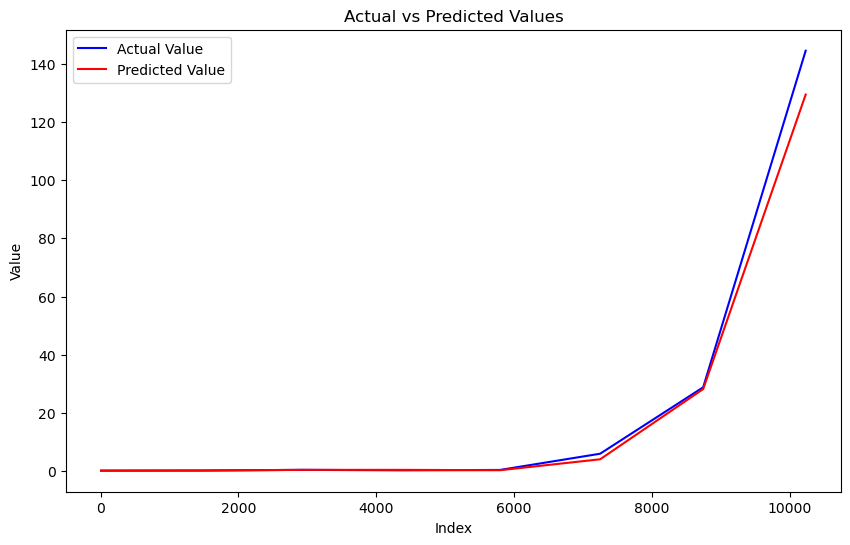

In [33]:
reg_model=reg_model.sort_index()
reg_model_365=reg_model[::365]

plt.figure(figsize=(10, 6))
plt.plot(reg_model_365["Actual Value"], label='Actual Value', color='b')
plt.plot(reg_model_365["Predicted value"], label='Predicted Value', color='r')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()